## Fraudulent Data Prediction
Binary classification of fraudulent and non-fraudulent accounts.

    Overview: 
        Classes: 2 
        Samples per class: 316(Fraudulent),328(Non-Fraudulent)
        Samples total: 642
        Dimensionality: 6
        Features: gender, age_at_joindate, loans_completed, primary_credit_score, education, employed

In [1]:
 #allow plots to appear inline
%matplotlib inline

#importations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics, neighbors, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.externals import joblib
import seaborn as sns

## 1. Train
### a.) Load the data

In [2]:
#Variables
#max_depth = 30
train_size = 400
random_state = 4
input_file = 'data/fraud_data.csv'

# Read data
data = pd.read_csv(input_file)
features  = ['gender', 'Age_at_joindate','loans_completed','primary_credit_score','education', 'employed']

#Define the training set and the output set
X = data.filter(items = features)
y= data['fraudulent']

### b.)Exploratory Analysis

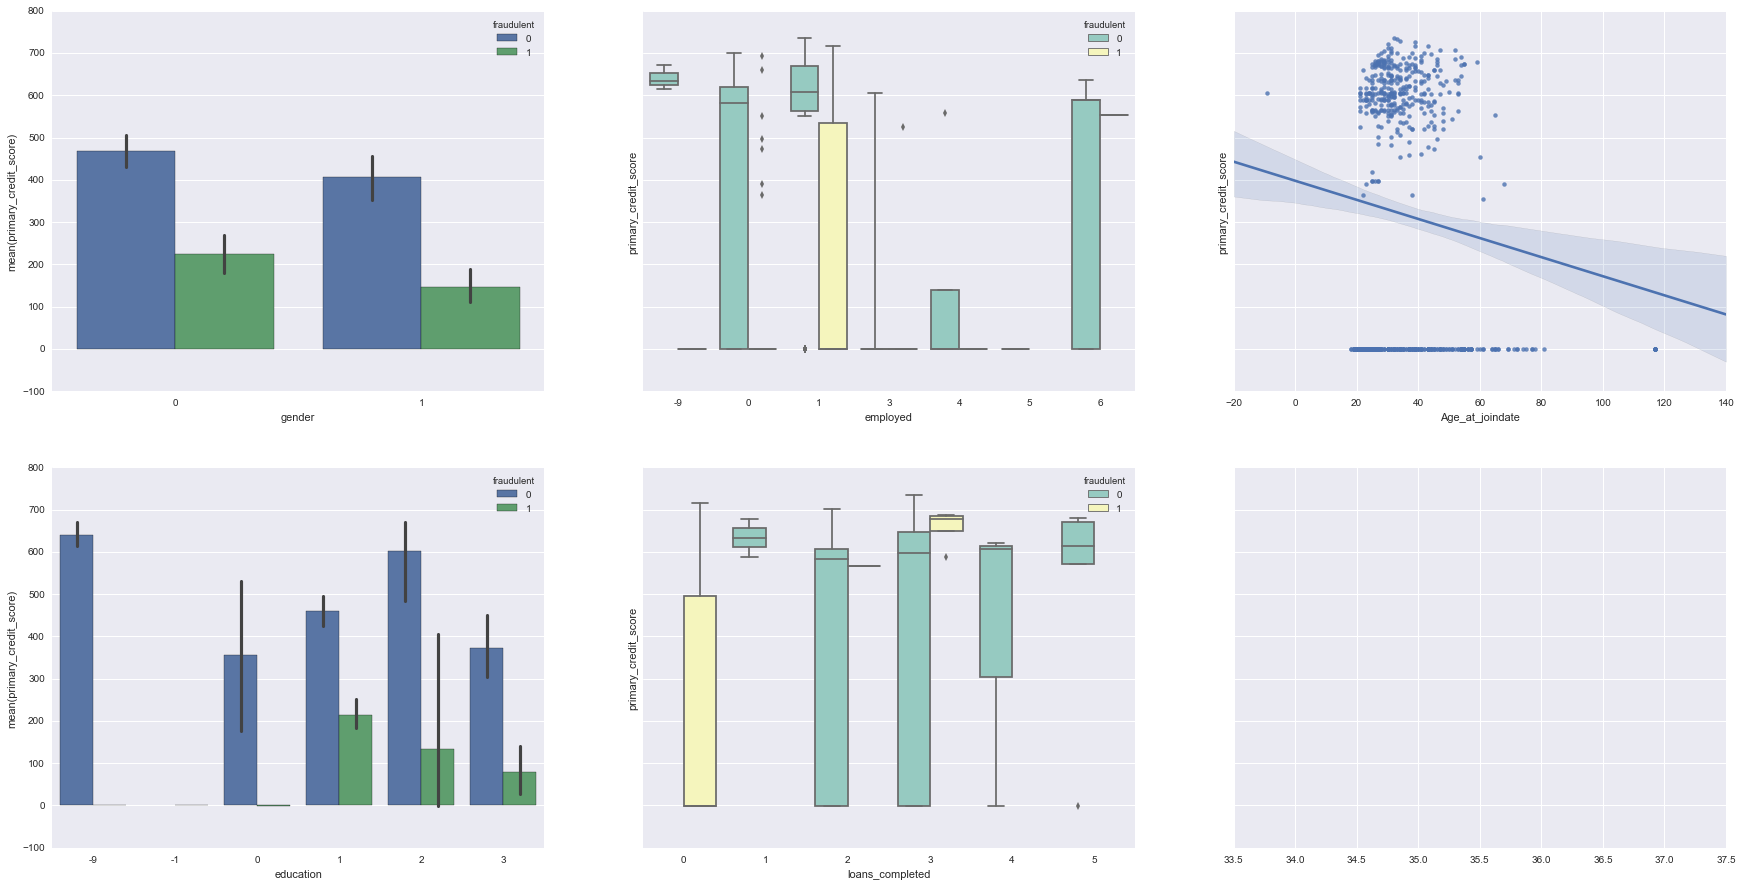

In [3]:
#To get a sense of the data, start by a few exploratory charts
fig, ((ax1, ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3,nrows=2, sharey=True,figsize=(15,5))
fig.set_size_inches(30, 15)

sns.barplot(x='gender', y='primary_credit_score', hue="fraudulent", data=data, ax=ax1)
sns.boxplot(x="employed", y="primary_credit_score", hue="fraudulent", data=data, palette="Set3", ax=ax2)
sns.regplot(x='Age_at_joindate', y='primary_credit_score', data=data, ax=ax3)
sns.barplot(x='education', y='primary_credit_score', hue="fraudulent", data=data, ax=ax4)
sns.boxplot(x="loans_completed", y="primary_credit_score", hue="fraudulent", data=data, palette="Set3", ax=ax5)

### c.) Separate the Training set and the Test set

Using the value specified in the 'train_size' variable we separate some data elements for testing and keep some 



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=train_size,random_state=random_state)

print('The input training set is of shape: ',X_train.shape)
print('The input test set is of shape: ',X_test.shape)


The input training set is of shape:  (400, 6)
The input test set is of shape:  (242, 6)


### d.) Create and train  classifiers


In [5]:
#Use logistic regression, support vector and KNN classifiers and compare performance
svm_classifier = svm.SVC(gamma=0.001)
knn_classifier = neighbors.KNeighborsClassifier()
logistic_classifier = linear_model.LogisticRegression()

#fit the 3 classifiers
svm_classifier.fit(X_train,y_train )
knn_classifier.fit(X_train,y_train )
logistic_classifier.fit(X_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 2. Test / Evaluate
To evaluate, we consider
1. The accuracy and Classification report
2. Confusion Matrices
3. The ROC Curve

In [6]:
expected = y_test

svm_predicted = svm_classifier.predict(X_test)
knn_predicted = knn_classifier.predict(X_test)
logistic_predicted = logistic_classifier.predict(X_test)

In [7]:
svm_accuracy = metrics.accuracy_score(expected, svm_predicted)
knn_accuracy = metrics.accuracy_score(expected, knn_predicted)
logistic_accuracy = metrics.accuracy_score(expected, logistic_predicted)

print('The accuracy of the SVM model is ', svm_accuracy)
print('The accuracy of the KNN  model is ', knn_accuracy)
print('The accuracy of the Logistic  model is ', logistic_accuracy)


print("\n\nFor a more elaborate analysis, consider the reports below:\n")
print("Classification report for the classifier %s:\n%s\n" % (svm_classifier, metrics.classification_report(expected, svm_predicted)))
print("Classification report for the classifier %s:\n%s\n" % (knn_classifier, metrics.classification_report(expected, knn_predicted)))
print("Classification report for the classifier %s:\n%s\n" % (logistic_classifier, metrics.classification_report(expected, logistic_predicted)))


The accuracy of the SVM model is  0.876033057851
The accuracy of the KNN  model is  0.880165289256
The accuracy of the Logistic  model is  0.979338842975


For a more elaborate analysis, consider the reports below:

Classification report for the classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.81      0.96      0.88       113
          1       0.95      0.81      0.87       129

avg / total       0.89      0.88      0.88       242


Classification report for the classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.83      0.93      0.88 

In [8]:
print("SVM Confusion matrix:\n%s" % metrics.confusion_matrix(expected, svm_predicted))
print("KNN Confusion matrix:\n%s" % metrics.confusion_matrix(expected, knn_predicted))
print("Logistic Confusion matrix:\n%s" % metrics.confusion_matrix(expected, logistic_predicted))

SVM Confusion matrix:
[[108   5]
 [ 25 104]]
KNN Confusion matrix:
[[105   8]
 [ 21 108]]
Logistic Confusion matrix:
[[110   3]
 [  2 127]]


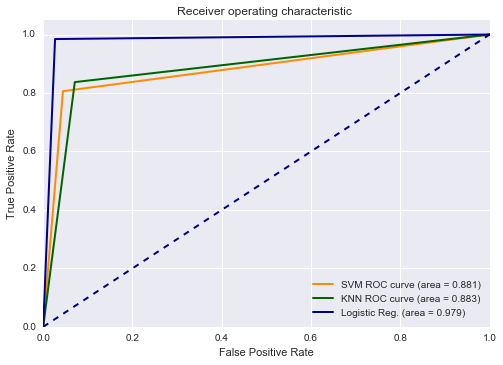

In [9]:
#ROC
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_predicted ) # SVM
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_predicted ) # knn
lg_fpr, lg_tpr, thresholds = roc_curve(y_test, logistic_predicted ) # Logistic

roc_auc1 = auc(svm_fpr, svm_tpr)
roc_auc2 = auc(knn_fpr, knn_tpr)
roc_auc3 = auc(lg_fpr, lg_tpr)

plt.figure()
lw = 2
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=lw, label='SVM ROC curve (area = %0.3f)' % roc_auc1)
plt.plot(knn_fpr, knn_tpr, color='darkgreen', lw=lw, label='KNN ROC curve (area = %0.3f)' % roc_auc2)
plt.plot(lg_fpr, lg_tpr, color='darkblue', lw=lw, label='Logistic Reg. (area = %0.3f)' % roc_auc3)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') #plot the random
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

#### Coefficients and Odd ratios
The logistic regression is clearly doing better

We print out its coefficients

In [13]:
logistic_classifier.coef_

array([[  3.83068404e-01,   9.89186018e-02,  -2.92179426e+00,
          6.22265661e-05,  -1.25761703e-01,   3.54130628e-01]])

We get the odds ratios by taking the exponent of the coeffecients

In [12]:
np.exp(logistic_classifier.coef_)

array([[ 1.46677836,  1.10397643,  0.053837  ,  1.00006223,  0.88182496,
         1.42494131]])

## 3. Apply

From the evaluation above, it is clear that the logistic model is the best of the three algorithms. As such the classifier is saved for later.

In [10]:
#For model persistence, store the model for later
joblib.dump(logistic_classifier, './classifiers/fraud_predictor.pkl')    

['./classifiers/fraud_predictor.pkl']

###### To apply the model to a new case, use the code below

In [11]:
clf = joblib.load('classifiers/fraud_predictor.pkl')
real_world_X = [0,43,0,527,1,1] #gender, age_at_joindate, loans_completed, primary_credit_score, education, employed
new_case = clf.predict(real_world_X)
print('For this new case we predicted ', new_case[0])

For this new case we predicted  1


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
